<a href="https://colab.research.google.com/github/emersonmrd/automacao_planilhas/blob/main/bootcamp_ml_rede_neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

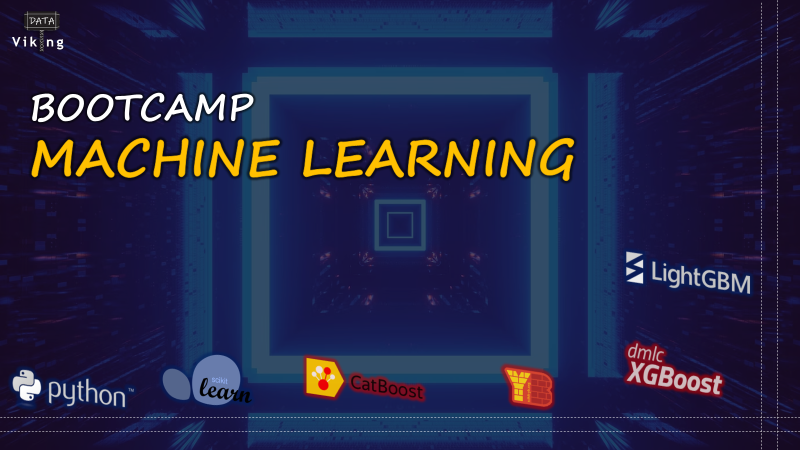

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

# Libs para a rede neural
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Importando base de dados
Base_Dados = pd.read_csv('Cancer_Data.csv')
Base_Dados.shape

(569, 33)

In [ ]:
Base_Dados.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Verificando
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
Base_Dados['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [ ]:
Base_Dados['diagnosis'].replace(  ['B', 'M'],[0, 1], inplace=True )
print(f'Classe 0 representa os cancer BENIGNO')
print(f'Classe 1 representa os cancer MALIGNO')

Classe 0 representa os cancer BENIGNO
Classe 1 representa os cancer MALIGNO


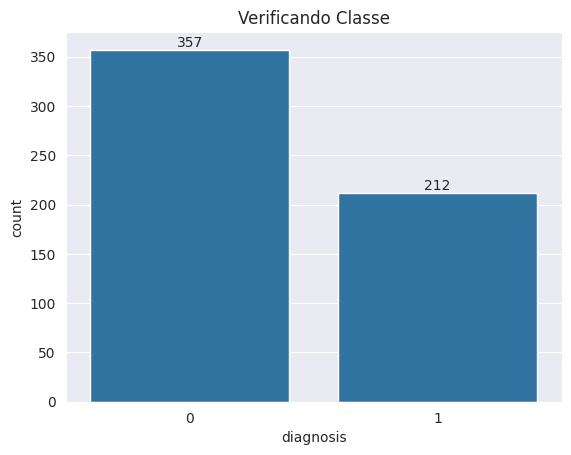

In [ ]:
Eixo = sns.countplot( data=Base_Dados, x='diagnosis')
plt.title('Verificando Classe')
Eixo.bar_label( Eixo.containers[0], label_type='edge' );

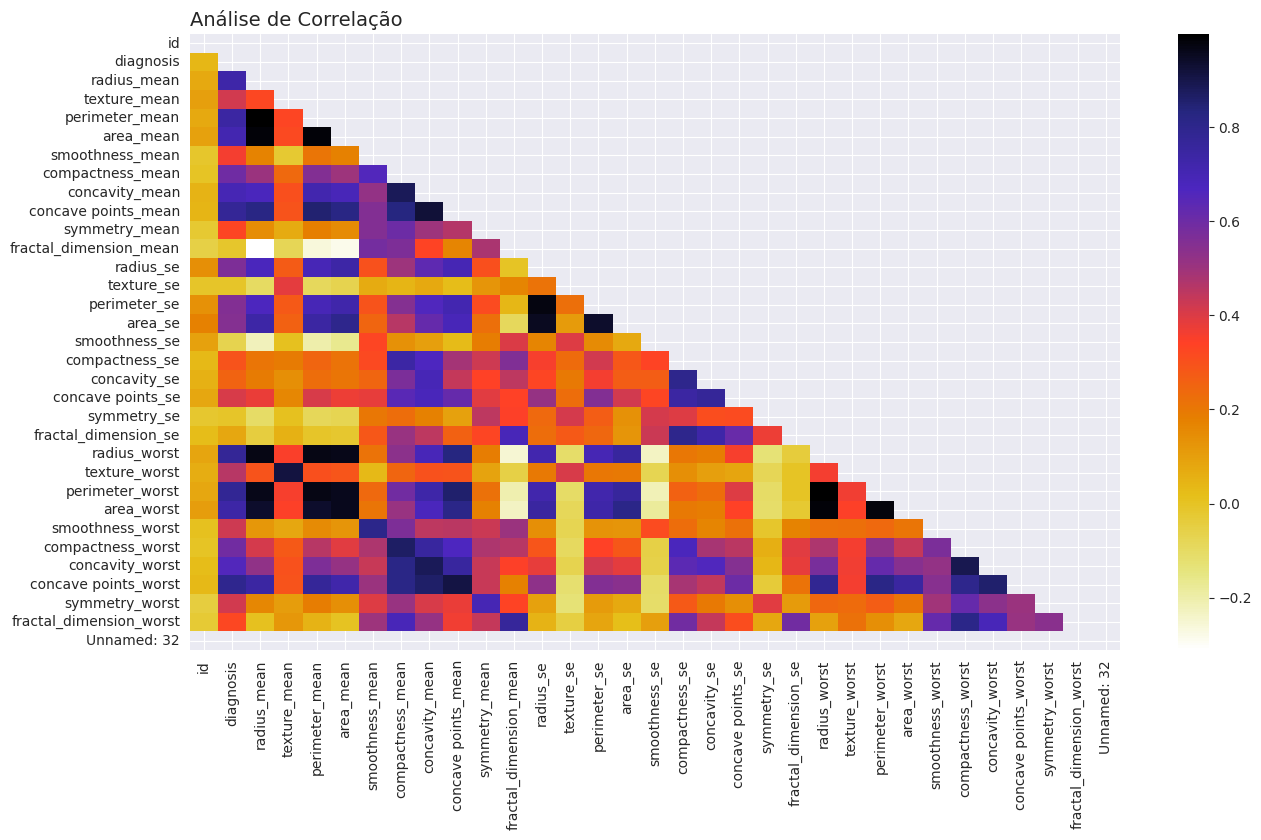

In [ ]:
# Plot
Figura, Eixo = plt.subplots( figsize=(15, 8) )

# Calculando Coor
Correlacao = Base_Dados.corr()

# Gere uma máscara para o triângulo superior
mask = np.zeros_like( Correlacao )
mask[ np.triu_indices_from(mask) ] = True

# Titulo
plt.title('Análise de Correlação', loc='left', fontsize=14)

# Plot
sns.heatmap(
    Correlacao,
    mask=mask,
    cmap='CMRmap_r',
    annot=False,
    );

In [ ]:
# Remover coluna ID
Base_Dados.drop( columns=['id', 'Unnamed: 32'], inplace=True )

In [ ]:
# Definir
Caracteristicas = Base_Dados.drop( columns='diagnosis')
Previsor = Base_Dados['diagnosis']

In [ ]:
Caracteristicas.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
Previsor.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


In [ ]:
# Separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(

    # Dados para a divisao
    Caracteristicas,
    Previsor,

    # Tamanho do teste
    test_size=0.2,

    # Fixar as amostrar
    random_state=10 )

X_train.shape, X_test.shape

((455, 30), (114, 30))

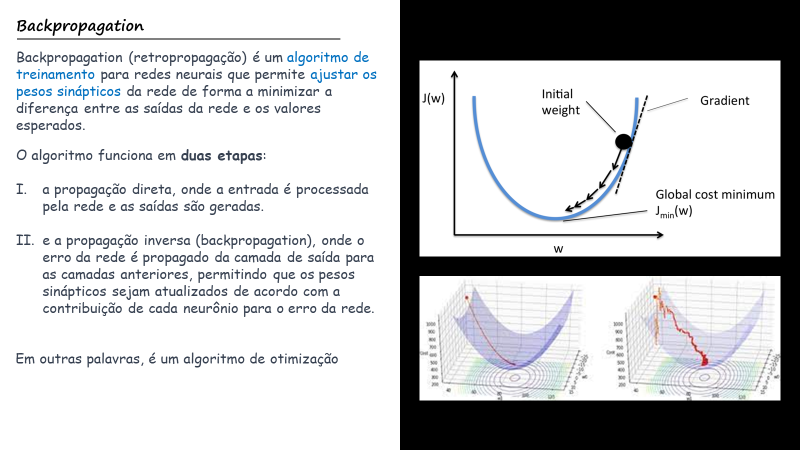

   
    # uma tupla que define o número de neurônios em cada camada oculta da rede neural.
    hidden_layer_sizes=(5, 5),

    # o número máximo de iterações durante o treinamento da rede neural.
    max_iter=1000,

    # a função de ativação usada nos neurônios da rede neural. Neste caso, a função ReLU.
    # {'identity', 'logistic', 'tanh', 'relu'}
    activation='relu',

    # o otimizador usado para ajustar os pesos da rede neural durante o treinamento. Neste caso, o otimizador Adam.
    # {'lbfgs', 'sgd', 'adam'}
    # lbfgs --> é um otimizador da família de métodos quasi-Newton.
    # 'sgd' --> refere-se à descida do gradiente estocástico.
    # 'adam' --> refere-se a um otimizador baseado em gradiente estocástico
    solver='adam',

    # parâmetro de regularização L2 para evitar o overfitting da rede neural.
    alpha=0.0001,

    # o número de amostras usadas em cada iteração do treinamento da rede neural.
    # Se for 'auto', o tamanho do batch será definido automaticamente.
    # Podemos alterar para batch_size=min(200)
    batch_size='auto',

    # a taxa de aprendizagem usada pelo otimizador durante o treinamento da rede neural. Neste caso, a taxa é constante.
    learning_rate='constant',

    # a taxa de aprendizagem inicial usada pelo otimizador durante o treinamento da rede neural.
    learning_rate_init=0.001,

    # o expoente para o inverso da taxa de aprendizagem usada pelo otimizador durante o treinamento da rede neural.
    power_t=0.5,

    # se as amostras devem ser embaralhadas antes de cada iteração do treinamento da rede neural.
    shuffle=True,

    # a tolerância para a convergência do treinamento da rede neural.
    tol=0.0001,

    # se deve imprimir informações de depuração durante o treinamento da rede neural.
    verbose=False,

    # se deve continuar treinando a rede neural a partir de seus pesos anteriores
    warm_start=False,

    # o valor do momentum usado pelo otimizador durante o treinamento da rede neural.
    momentum=0.9,

    # se o momentum de Nesterov deve ser usado pelo otimizador durante o treinamento da rede neural
    nesterovs_momentum=True,

    # se deve parar o treinamento da rede neural cedo com base no conjunto de validação.
    early_stopping=False,

    # a fração do conjunto de treinamento usada como conjunto de validação.
    validation_fraction=0.1,

    # o valor do hiperparâmetro beta_1 usado pelo otimizador Adam.
    beta_1=0.9,

    # o valor do hiperparâmetro beta_2 usado pelo otimizador Adam.
    beta_2=0.999,

    # o valor do hiperparâmetro epsilon usado pelo otimizador Adam.
    epsilon=1e-08,

    # o número de iterações sem melhora consecutiva do conjunto de validação antes de interromper o treinamento.
    n_iter_no_change=10,

    # o número máximo de avaliações de função objetivo permitidas durante a otimização.
    max_fun=15000
    )

In [ ]:
# Treinar a rede neural
mlp = MLPClassifier(

    # uma tupla que define o número de neurônios em cada camada oculta da rede neural.
    hidden_layer_sizes=( 100 ),

    # a função de ativação usada nos neurônios da rede neural. Neste caso, a função ReLU.
    # {'identity', 'logistic', 'tanh', 'relu'}
    activation='tanh',

    # GRadiente
    # o otimizador usado para ajustar os pesos da rede neural durante o treinamento. Neste caso, o otimizador Adam.
    # {'lbfgs', 'sgd', 'adam'}
    # lbfgs --> é um otimizador da família de métodos quasi-Newton.
    # 'sgd' --> refere-se à descida do gradiente estocástico.
    # 'adam' --> refere-se a um otimizador baseado em gradiente estocástico
    solver='sgd',

    # o número máximo de iterações durante o treinamento da rede neural.
    max_iter=500,

    # Imprimir o log de treinamento
    verbose=True,

     # a taxa de aprendizagem inicial usada pelo otimizador durante o treinamento da rede neural.
    learning_rate_init=0.001,

    # parâmetro de regularização L2 para evitar o overfitting da rede neural.
    alpha=0.0001,

)

mlp.fit( X_train, y_train )

Iteration 1, loss = 0.82854041
Iteration 2, loss = 0.72378385
Iteration 3, loss = 0.61897152
Iteration 4, loss = 0.55932678
Iteration 5, loss = 0.50722582
Iteration 6, loss = 0.50018879
Iteration 7, loss = 0.48688080
Iteration 8, loss = 0.49284402
Iteration 9, loss = 0.47107200
Iteration 10, loss = 0.46821602
Iteration 11, loss = 0.45909633
Iteration 12, loss = 0.45057191
Iteration 13, loss = 0.47180554
Iteration 14, loss = 0.47518783
Iteration 15, loss = 0.43695745
Iteration 16, loss = 0.45213889
Iteration 17, loss = 0.44412812
Iteration 18, loss = 0.42737985
Iteration 19, loss = 0.42378620
Iteration 20, loss = 0.43034205
Iteration 21, loss = 0.40400813
Iteration 22, loss = 0.42046964
Iteration 23, loss = 0.41728702
Iteration 24, loss = 0.40067829
Iteration 25, loss = 0.42209378
Iteration 26, loss = 0.38451079
Iteration 27, loss = 0.44060077
Iteration 28, loss = 0.37279556
Iteration 29, loss = 0.38479689
Iteration 30, loss = 0.42787914
Iteration 31, loss = 0.38521543
Iteration 32, los

MLPClassifier(activation='tanh', hidden_layer_sizes=100, max_iter=500,
              solver='sgd', verbose=True)

In [ ]:
# Fazendo a predição dos dados de teste
y_pred = mlp.predict( X_test )

# Calculando a acurácia do modelo
acc = accuracy_score(y_test, y_pred)

print("Acurácia (Previsão):", acc)

#Default: 'Acurácia (Previsão): 0.9298245614035088'
# 3 camadas x 100 N 'Acurácia (Previsão): 0.9298245614035088'
# Acurácia (Previsão): 0.6578947368421053
# Acurácia (Previsão): 0.9210526315789473
# Acurácia (Previsão): 0.9298245614035088
# Acurácia (Previsão): 0.9473684210526315

Acurácia (Previsão): 0.9122807017543859


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# define a pipeline
pipeline = Pipeline([
    ( 'mlp', MLPClassifier() )
])

# define os parâmetros para serem testados
param_grid = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (150,), (200) ],
    'mlp__solver': ['lbfgs', 'sgd', 'adam'],
    'mlp__learning_rate_init': [0.001],
    'mlp__activation': ['relu', 'tanh', 'logistic', 'identity']
}

# executa a busca em grade
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, verbose=2 )
grid_search.fit(Caracteristicas , Previsor)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001, mlp__solver=lbfgs; total time=   0.0s
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001, mlp__solver=lbfgs; total time=   0.1s
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001, mlp__solver=lbfgs; total time=   0.1s
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001, mlp__solver=lbfgs; total time=   0.4s
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001, mlp__solver=lbfgs; total time=   0.1s
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001, mlp__solver=sgd; total time=   0.2s
[CV] END mlp__activation=

GridSearchCV(cv=5, estimator=Pipeline(steps=[('mlp', MLPClassifier())]),
             param_grid={'mlp__activation': ['relu', 'tanh', 'logistic',
                                             'identity'],
                         'mlp__hidden_layer_sizes': [(50,), (100,), (150,),
                                                     200],
                         'mlp__learning_rate_init': [0.001],
                         'mlp__solver': ['lbfgs', 'sgd', 'adam']},
             verbose=2)

In [ ]:
grid_search.best_params_

{'mlp__activation': 'relu',
 'mlp__hidden_layer_sizes': (150,),
 'mlp__learning_rate_init': 0.001,
 'mlp__solver': 'lbfgs'}

In [ ]:
grid_search.best_score_

0.947259742276044

In [ ]:
grid_search.cv_results_

{'mean_fit_time': array([0.13366957, 0.25068498, 0.81602368, 0.79707088, 0.18268428,
        0.60378428, 1.06441236, 0.51764531, 0.5291285 , 0.68265657,
        0.112465  , 0.36301942, 1.2797749 , 0.18676715, 0.66541705,
        1.8031641 , 0.30049915, 0.9859684 , 2.38608623, 0.57149267,
        1.46052666, 3.00071573, 0.59535403, 1.09017944, 1.0528254 ,
        0.55305643, 0.58797512, 1.04333181, 1.0018836 , 0.68525858,
        1.55293207, 0.80797067, 0.84404378, 1.80601182, 0.89797955,
        1.4642868 , 0.2769217 , 0.07736778, 0.39459224, 0.30933928,
        0.13670483, 0.3253336 , 0.41266637, 0.35136166, 0.65563378,
        0.5672883 , 0.19394665, 0.32577457]),
 'std_fit_time': array([0.13608363, 0.22244802, 0.54034718, 0.32028399, 0.22204372,
        0.11071967, 0.45183839, 0.62700022, 0.08783225, 0.49640994,
        0.02806836, 0.10750156, 0.41915524, 0.03893325, 0.08276718,
        0.51371258, 0.0858632 , 0.22087755, 0.53002139, 0.11574906,
        0.39513611, 0.54093386, 0.145

In [ ]:
from sklearn.metrics import classification_report

# Fazer as previsões
y_pred = grid_search.predict(X_test)

# Calcular o relatório de classificação
print( classification_report( y_test, y_pred ) )

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        75
           1       0.92      0.90      0.91        39

    accuracy                           0.94       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

